In [60]:
%matplotlib inline
import numpy as np
import matplotlib as plt
from qutip import *
def Energy_k(w,k1,k2,phi,t):
    delta1 = np.array([1,0])
    delta2 = np.array([1/2,-np.sqrt(3)/2])
    g1 = 4*np.pi/(np.sqrt(3))*np.array([1,0])
    g2 = 4*np.pi/(np.sqrt(3))*np.array([1/2,-np.sqrt(3)/2])
    k = k1*delta1 + k2*delta2
    alpha1 = np.inner(k,delta1)/2
    alpha2 = np.inner(k,delta2)/2
    alpha12 = alpha1 - alpha2
    H = Qobj([[w,2 * t * np.exp(1j * phi)*np.cos(alpha1),2 * t * np.exp(-1j * phi)*np.cos(alpha2)],
             [2 * t * np.exp(-1j * phi)*np.cos(alpha1),w,2 * t * np.exp(1j * phi)*np.cos(alpha12)],
              [2 * t * np.exp(1j * phi)*np.cos(alpha2),2 * t * np.exp(-1j * phi)*np.cos(alpha12),w]
             ])
    evals = H.eigenenergies()
    return (evals )

In [61]:
def Energy_k_edge(w,k1,phi,t):
    delta1 = np.array([1,0])
    delta2 = np.array([1/2,-np.sqrt(3)/2])
    g1 = 4*np.pi/(np.sqrt(3))*np.array([1,0])
    g2 = 4*np.pi/(np.sqrt(3))*np.array([1/2,-np.sqrt(3)/2])
    k = k1*delta1
    alpha1 = np.inner(k,delta1)/2
    alpha2 = np.inner(k,delta2)/2
    alpha12 = alpha1 - alpha2
    #define the geometry and unit vector in coordinate space and momentum space
    H = np.zeros((8,8),np.complex64)
    for i in range(8):
        H[i][i] = w
    #diagonal elements of Hamiltonian
    H[0][1] = 2*t*np.cos(alpha1)*np.exp(1j*phi)#
    H[0][2] = t*np.exp(-1j*phi)*np.exp(-1j*alpha2)#
    H[1][0] = 2*t*np.cos(alpha1)*np.exp(-1j*phi)#
    H[1][2] = t*np.exp(1j*phi)*np.exp(1j*alpha12)#
    H[2][0] = t*np.exp(1j*phi)*np.exp(1j*alpha2)#
    H[2][1] = t*np.exp(-1j*phi)*np.exp(-1j*alpha12)#
    H[2][3] = t*np.exp(-1j*alpha2)*np.exp(-1j*phi)#
    H[2][4] = t*np.exp(-1j*alpha12)*np.exp(1j*phi)#
    H[3][2] = t*np.exp(1j*alpha2)*np.exp(1j*phi)#
    H[3][4] = 2*t*np.cos(alpha1)*np.exp(1j*phi)#
    H[3][5] = t*np.exp(-1j*phi)*np.exp(-1j*alpha2)#
    H[4][2] = t*np.exp(1j*alpha12)*np.exp(-1j*phi)#
    H[4][3] = 2*t*np.cos(alpha1)*np.exp(-1j*phi)#
    H[4][5] = t*np.exp(1j*phi)*np.exp(1j*alpha12)#
    H[5][3] = t*np.exp(1j*phi)*np.exp(1j*alpha2)#
    H[5][4] = t*np.exp(-1j*phi)*np.exp(-1j*alpha12)#
    H[5][6] = t*np.exp(1j*phi)*np.exp(-1j*alpha2)#
    H[5][7] = t*np.exp(-1j*phi)*np.exp(1j*alpha12)#
    H[6][5] = t*np.exp(-1j*phi)*np.exp(1j*alpha2)#
    H[6][7] = 2*t*np.cos(alpha1)*np.exp(-1j*phi)#
    H[7][6] = 2*t*np.cos(alpha1)*np.exp(1j*phi)#
    H[7][5] = t*np.exp(1j*phi)*np.exp(-1j*alpha12)#
    H = Qobj(H)
    evals = H.eigenenergies()
    return evals

In [56]:
Energy_k(1,0,0,1)

array([-1.        , -1.        , -1.        , -0.64575131,  0.26794919,
        3.        ,  3.73205081,  4.64575131])

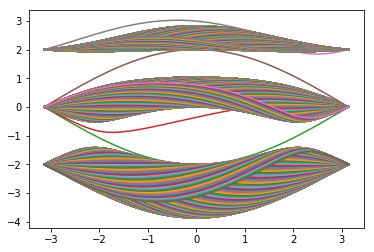

In [76]:
fig, ax = plt.pyplot.subplots()
step_k = 1000
k = np.linspace(-np.pi,np.pi,step_k)
result = []
phi = np.pi/4
for i in k:
    result.append(Energy_k_edge(1,i,phi,1)-1)
for j in range(8):
    ax.plot(k,[temp[j] for temp in result])
#edge_mode
step_k = 1000
k = np.linspace(-np.pi,np.pi,step_k)
step_k_2 = 1000
k_2 = np.linspace(-10*np.pi,10*np.pi,step_k_2)
for u in k_2:
    result = []
    for i in k:
        result.append(Energy_k(1,i,u,phi,1)-1)
    for j in range(3):
        ax.plot(k,[temp[j] for temp in result])
#normal_mode